# 데이터 전처리 (Data Preprocessing)
---

ML 알고리즘은 데이터를 기반으로 합니다. 따라서 어떤 데이터를 훈련(입력)하느냐에 따라 그 성능의 결과가 크게 달라질 수 있습니다.**(Garbage In Garbage Out)**

따라서 사이킷런의 ML 알고리즘을 사용하기 전에 데이터에 대해 미리 처리해야하는 작업이 데이터 전처리입니다.

## 결측치(결손값)
---

첫번째 데이터 전처리 대상은 결측치(결손값), 즉 Null값에 대한 이슈를 해결하는 것입니다. 

데이터 전처리를 통해 Null값을 다른 고정된 값으로 변환해야 합니다. 하지만 데이터의 특징에 따라 Null값을 어떻게 처리해야 할지 달라집니다.

**`1. 피처 값 중 Null값의 비율이 매우 작을 경우`**

위 경우에는 단순히 평균값, 최빈값 등으로 대체하는 방법이 있습니다.

**`2. 피처 값 대부분이 Null값인 경우`**

위 경우에는 과감히 해당 피처를 드롭하는 것이 ML 알고리즘 성능 개선이 더 효과적일 수 있습니다.

**`3. 중요한 피쳐의 Null값의 분포가 일정 수준 이상일 경우`**

위 경우가 Null값 처리의 핵심이 되겠습니다. 일정 수준의 기준은 데이터에 따라 달라질 수 있습니다. 
또한 중요한 피처인 경우 1번, 2번 방식으로 결측치를 처리하게 되면 예측 왜곡이 심하게 나타날 수 있어 업무 로직, 필드 지식 등을 상세히 검토하여 더 정밀한 값으로 대체해야합니다.

## 비정형 데이터(문자열)
---

sklearn의 ML 알고리즘은 문자열 데이터를 입력 값으로 받지 못합니다.**(카테고리형, 텍스트)**

문자열 데이터가 `카테고리형 변수라면 원핫인코딩` 방식을 통해 이를 숫자형 데이터로 변환하는 작업이 필요합니다.

추가적으로 문자열 데이터가 `텍스트형 데이터라면 Feature Vectorization` 등의 기법으로 벡터화하거나 단순히 행을 식별하는 주민번호, ID 와 같은 데이터는 삭제하는 편이 좋습니다.

# 데이터 인코딩
---

데이터 인코딩 방식에는 크게 **`레이블 인코딩(Label encoding)`**과 **`원-핫 인코딩(One Hot encoding)`**이 있습니다.

## Label encoding
---

레이블 인코딩이란 예를 들어 학생 데이터의 학과 구분이 `'경영정보학과','경영학과','국제통상학과'` 값으로 돼 있다면 `경영정보학과:1, 경영학과:2, 국제통상학과:3` 과 같은 숫자형 변수로 변환하는 것입니다.

**레이블 인코딩**

sklearn은 레이블 인코딩을 위해 `LabelEncoder` 클래스를 제공합니다.

In [23]:
import pandas as pd

df = pd.DataFrame({'학과':['경영정보학과','경영학과','국제통상학과']})
df

,학과
0,경영정보학과
1,경영학과
2,국제통상학과


In [18]:
# 레이블 인코더 임포트
from sklearn.preprocessing import LabelEncoder

depts = ['경영정보학과','경영학과','국제통상학과']

# LabelEncoder를 객체로 생성
encoder = LabelEncoder()

# fit, transform 메소드를 통한 레이블 인코딩
encoder.fit(depts)
labels = encoder.transform(depts)

print('레이블 인코딩 클래스 : ',encoder.classes_) # 인코딩 클래스는 classes_속성값으로 확인
print('레이블 인코딩 변환값 : ',labels)

레이블 인코딩 클래스 :  ['경영정보학과' '경영학과' '국제통상학과']
레이블 인코딩 변환값 :  [0 1 2]


classes_ 속성은 0번부터 순서대로 변환된 인코딩 값을 원본 데이터를 가집니다. 따라서 `inverse_transform `메소드를 통해 디코딩 또한 가능합니다.

In [20]:
print('디코딩 결과: ', encoder.inverse_transform(labels))

디코딩 결과:  ['경영정보학과' '경영학과' '국제통상학과']


In [24]:
df['학과'] = encoder.fit_transform(df['학과'])
df

,학과
0,0
1,1
2,2


In [25]:
df['학과'] = encoder.inverse_transform(df['학과'])
df

,학과
0,경영정보학과
1,경영학과
2,국제통상학과


위 결과와 같이 레이블 인코딩이란 카테고리형 문자열 데이터를 숫자형 카테고리 값으로 변환합니다.

하지만 일부 `선형회귀와 같이 숫자의 크고 작음을 가중치로 이용하는 ML 알고리즘에서는 레이블 인코딩을 사용해선 안됩니다.`

즉, 위 데이터와 같은 학과 정보의 인코딩 결과는 학과의 `우열을 나누는 기준이 아니라 단순한 식별 코드`이기 때문입니다.

따라서 숫자의 크고 작음을 기준으로 가중치를 적용하지 않는 `트리 계열의 ML 알고리즘에서 사용`할 수 있습니다.

## 원-핫 인코딩(One-Hot encoding)
---

레이블 인코딩의 문제점을 보완하기 위한 방법으로 원-핫 인코딩을 사용할 수 있습니다.

원-핫 인코딩이란 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방법입니다.

In [26]:
df

,학과
0,경영정보학과
1,경영학과
2,국제통상학과


In [27]:
pd.get_dummies(df)

,학과_경영정보학과,학과_경영학과,학과_국제통상학과
0,1,0,0
1,0,1,0
2,0,0,1


원-핫 인코딩은 sklearn의 **OneHotEncoder** 클래스로 구현 가능합니다.

단 LabelEncoder와 차이점은 **모든 문자열 값이 숫자형으로 변환**돼야 한다는 점과 **입력 값으로 2차원 데이터가 필요**하다는 점입니다.

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

depts = ['경영정보학과','경영학과','국제통상학과']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환합니다.
encoder = LabelEncoder()
encoder.fit(depts)
labels = encoder.transform(depts)
print(labels,'\n')

# 2차원 데이터로 변환
labels = labels.reshape(-1,1)
print(labels)
print(labels.ndim,'차원\n')


# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())



[0 1 2] 

[[0]
 [1]
 [2]]
2 차원

원-핫 인코딩 데이터
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


이전에 원핫인코딩의 예시로 pd.get_dummies 라는 함수를 사용했습니다.

이 함수를 이용하면 sklearn의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자로 변환할 필요 없이 바로 변환이 가능합니다.

# 피처 스케일링과 정규화
---

**피처 스케일링(Feature Scaling)**이란 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업입니다.

피처 스케일링을 위한 대표적인 방법으로는 **`표준화(Standardization)`**와 **`정규화(Normalization)`**가 있습니다.

## 표준화 (Standardization)
---

**표준화**란 데이터의 피처 각각이 `평균이 0`이고 `분산이 1`인 **가우시안 정규 분포**를 가진 값으로 변환하는 것입니다.

표준화를 통해 변환될 피처 x의 새로운 i번째 데이터를 xi_new 라고 가정한다면 이 값은 원래 값(xi)에서 피처 x의 평균을 뺀 값에 피처 x의 표준편차로 계산할 수 있습니다.

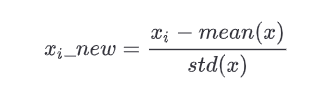

## 정규화 (Normalization)
---

**정규화**란 `서로 다른 피처의 크기를 통일`하기 위해 `개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것`입니다.

예를 들어 아파트 평수를 나타내는 피처의 값이 0~100 으로 주어지고 또 다른 매매가격을 나타내는 피처의 값이 0 ~ 10,000,000,000 으로 주어진다면 이 변수들의 크기를 통일시켜 비교하기 위한 작업으로 모두 최소 0 ~ 최대 1의 값으로 변환하는 것입니다.

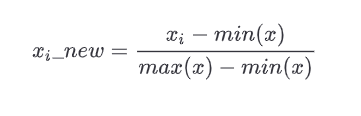

## sklearn의 Normalizer 모듈과 일반적인 정규화의 차이점
----

sklearn의 Normalizer 모듈은 일반 정규화 개념과 큰 개념은 같지만 `선형대수의 정규화 개념`을 이용하는 것이 차이점입니다.

**sklearn의 Normalizer는 개별 벡터의 크기를 맞추기 위해 개별 벡터를 모든 피처 벡터의 크기로 나눠줍니다.**

아래는 세개의 피처 x, y, z가 있다고 가정한 경우입니다.

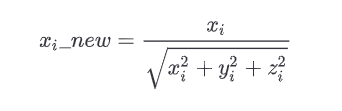

## Standard Scaler
----

sklearn에서는 **`StandardScaler를 통한 표준화`** 기능을 지원합니다.

앞서 설명했듯이 StandardScaler를 통해 개별 피처를 **평균이 0이고 분산이 1인 가우시안 정규 분포**의 값으로 변환하는 것이 가능합니다.

표준화는 **`RBF 커널을 이용하는 서포트 벡터 머신(Support Vector Machine), 선형 회귀(Linear Regression), 로지스틱 회귀(Logistic Regression)은 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현`**되었기 때문에 표준화 작업을 통해 더 좋은 성능의 ML 알고리즘을 구현할 수 있습니다.

In [76]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [78]:
print('feature 평균: \n\n',iris_df.mean(),'\n\n')
print('feature 분산: \n\n',iris_df.var())

feature 평균: 

 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64 


feature 분산: 

 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [89]:
from sklearn.preprocessing import StandardScaler

# StadardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환, fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환, 데이터프레임으로 변환 작업 필요
iris_df = pd.DataFrame(iris_scaled)
print('feature 평균: \n\n',iris_df.mean().astype(int),'\n\n')
print('feature 분산: \n\n',iris_df.var().astype(int))

feature 평균: 

 0    0
1    0
2    0
3    0
dtype: int32 


feature 분산: 

 0    1
1    1
2    1
3    1
dtype: int32


## MinMaxScaler
---

MinMaxScaler는 데이터의 값을 **0과 1사이의 범위 값**으로 변환하는 기능을 지원합니다.(음수 값 존재시 -1 ~ 1)

**`데이터의 분포가 가우시안 분포가 아닐 경우 Min, Max Scale을 적용할 수 있습니다. `**

In [90]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 결과는 ndarraay, 데이터 프레임으로 변환
iris_df = pd.DataFrame(iris_scaled)
print('feature 최솟값: \n\n',iris_df.min().astype(int),'\n\n')
print('feature 최댓값: \n\n',iris_df.max().astype(int))

feature 최솟값: 

 0    0
1    0
2    0
3    0
dtype: int32 


feature 최댓값: 

 0    1
1    1
2    1
3    1
dtype: int32


## 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
---

`StandardScaler`나 `MinMaxScaler`와 같은 sklearn에서 제공하는 Scaler 객체를 이용할 때 `fit() 메소드를 이용해 데이터 변환을 위한 기준 정보를 설정`합니다.(최댓값/최솟값 설정 등) 그리고 그 기준 정보를 바탕으로 `transform()메소드를 통해 데이터를 변환`합니다.

그런데 학습 데이터 세트와 테스트 데이터 세트로 나뉘어져 있는 경우 `학습 데이터 세트로 fit()이 적용된 스케일링 기준 정보를 테스트 데이터에 적용해야합니다.`

**그 이유는 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 달라 올바른 예측 결과를 도출하지 못할 가능성이 커지기 때문입니다.**

아래의 코드는 테스트 데이터에 fit() 메소드를 적용할 때 어떤 문제가 발생하는지를 구현한 코드입니다.

In [93]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능,

train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 반환
scaler = MinMaxScaler()

# fit() 적용, train_array 데이터 최솟값:0, 최댓값: 10 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변홤. 원본 10->1
train_scaled = scaler.transform(train_array)

print('원본 train_array :', np.round(train_array.reshape(-1),2))
print('Scale된 train_array :', np.round(train_scaled.reshape(-1),2))

원본 train_array : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


이번에는 테스트 데이터 세트를 변환합니다. `(스케일링 기준 test 데이터 다시 적용하는 경우)`

In [94]:
# MinMaxScaler에 test_array를 fit(), 최솟값 0, 최댓값 5 설정
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환. 원본 5 -> 1
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array :', np.round(test_array.reshape(-1),2))
print('Scale된 test_array :', np.round(test_scaled.reshape(-1),2))

원본 test_array : [0 1 2 3 4 5]
Scale된 test_array : [0.  0.2 0.4 0.6 0.8 1. ]


위 결과를 통해 학습 데이터와 테스트 데이터가 서로 다른 스케일 기준 정보를 가지면 `서로 다른 데이터가 같은 값으로 변환되는 결과를 초래`하는 것을 알 수 있습니다.

**ML 모델은 학습 데이터를 기준으로 학습되기 때문에 반드시 스케일 기준 정보는 학습 데이터를 따라야합니다.**

In [95]:
# 같은 스케일 기준 정보를 통한 정규화

scaler = MinMaxScaler()

scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array :', np.round(train_array.reshape(-1),2))
print('Scale된 train_array :', np.round(train_scaled.reshape(-1),2))

test_scaled = scaler.transform(test_array)
print('원본 test_array :', np.round(test_array.reshape(-1),2))
print('Scale된 test_array :', np.round(test_scaled.reshape(-1),2))

원본 train_array : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array : [0 1 2 3 4 5]
Scale된 test_array : [0.  0.1 0.2 0.3 0.4 0.5]


fit() 메소드와 transform() 메소드를 한번에 이용하기 위해 fit_transform() 메소드를 지원합니다. 

학습 데이터에 대해 스케일링을 할 때 fit_transform() 메소드를 사용해도 문제가 없지만 test 데이터에 대해서는 반드시 transform()만 사용하는 것을 기억하시기 바랍니다.